In [1]:
import numpy as np
from numpy import genfromtxt
from matplotlib import pyplot as plt
import pandas as pd

%matplotlib inline



In [2]:
train = genfromtxt('E:\\INSOFE\\AI and Deep Learning\\day1\\ANN\\train_solved.csv', delimiter=',')
test = genfromtxt('E:\\INSOFE\\AI and Deep Learning\\day1\\ANN\\test_solved.csv', delimiter=',')

In [5]:
train

array([[ 0.,  0.,  0., ...,  0.,  0.,  2.],
       [ 0.,  0.,  0., ...,  0.,  0.,  3.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  9.],
       [ 0.,  0.,  0., ...,  0.,  0.,  8.],
       [ 0.,  0.,  0., ...,  0.,  0.,  5.]])

In [3]:
x_train = train[:,0:784] 
y_train = train[:,784]
x_test = test[:,0:784] 
y_test = test[:,784]

In [4]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train) 
y_test = to_categorical(y_test) 

Using TensorFlow backend.


In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
opt = Adam(lr=0.1)

from keras.callbacks import ReduceLROnPlateau, EarlyStopping
lrr = ReduceLROnPlateau(monitor='loss', min_lr=1e-4, factor=0.02, epsilon=0.0001, patience=10)
early_stop = EarlyStopping(monitor='loss', min_delta=1e-2, patience=10, verbose=1)
error=[]
train=[]
for i in range(5,1000,100):
    model=Sequential()

    model.add(Dense(i,input_dim=784,activation='sigmoid'))


    model.add(Dense(10,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    model.fit(x_train,y_train,epochs=1,callbacks=[lrr,early_stop],verbose=0)
    c=model.evaluate(x_train,y_train)
    a=model.evaluate(x_test,y_test)
    error.append(a[0])
    train.append(c[0])
print(error)

 9728/10000 [============================>.] - ETA: 0s[1.1277901681900024, 0.36410744409561158, 0.33907118790149687, 0.30501363837718964, 0.30300495128631594, 0.32532682558298109, 0.28824046843051909, 0.29095182237625122, 0.29273838412761688, 0.28845779232978819]


[1.1439859515508015, 0.36751260137160618, 0.34515167378981909, 0.31234249867995578, 0.30998577973842623, 0.33031461796959244, 0.29045077302455902, 0.29552921282847722, 0.2914784077147643, 0.29572556243538856]
[5, 105, 205, 305, 405, 505, 605, 705, 805, 905]


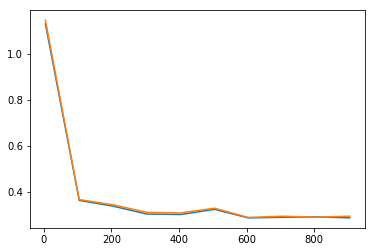

In [6]:
b=[]
print(train)
for i in range(5,1000,100):
    b.append(i)
print(b)
plt.plot(b,error)
plt.plot(b,train)